# Handwritten Character Classification

**Optical Character Recognition (OCR) is the process of converting images of handwritten or printed text into machine-encoded text. This project demonstrates the implementation of Optical Character Recognition (OCR) using three different machine learning techniques: K-Nearest Neighbors (KNN), Artificial Neural Networks (ANN), and Convolutional Neural Networks (CNN). The objective is to compare the performance and accuracy of these models in recognizing handwritten characters.** 

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import datetime
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras import  layers, models 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
from sklearn.model_selection import train_test_split
import seaborn as sns
import tensorflow as tf
import pickle
from sklearn.preprocessing import OneHotEncoder 
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from sklearn.neural_network import MLPClassifier
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras import backend as K
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Activation, Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.utils import to_categorical
import itertools

## Dataset

The **EMNIST** (Extended Modified National Institute of Standards and Technology) dataset is an extension of the MNIST dataset, containing handwritten character images. It comprises handwritten characters in various forms, such as **uppercase letters, lowercase letters, digits, and even some symbols.**

The dataset is organized into several different splits or subsets, each representing a different classification task:

* **ByClass:** Contains letters and digits. There are 814,255 characters in this dataset split.
* **ByMerge:** Similar to ByClass but with merged classes (e.g., uppercase 'C' and lowercase 'c' are considered the same). It contains 814,255 characters.
* **Balanced:** Contains a balanced set of characters for each class. There are 131,600 characters in this dataset split.
* **Letters:** Contains only letters. It consists of 145,600 characters.
* **Digits:** Contains only digits. It consists of 280,000 characters.

**Here we have used the balanced emnist dataset**

In [2]:
# Importing the dataset
train_set = pd.read_csv("train_dataset.csv")
test_set = pd.read_csv("test_dataset.csv")

## Preprocessing

<Axes: ylabel='count'>

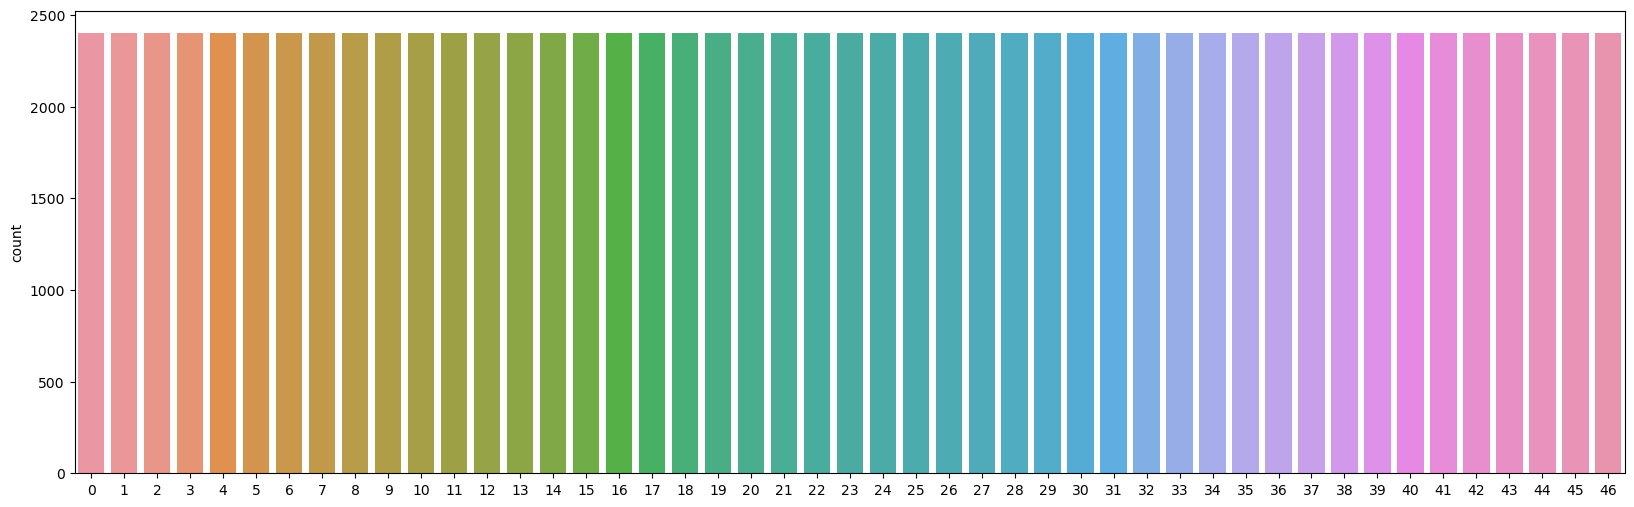

In [3]:
labels1 = train_set["45"].values

plt.figure(figsize=(20,6))
plt.plot()
sns.countplot(x=labels1)

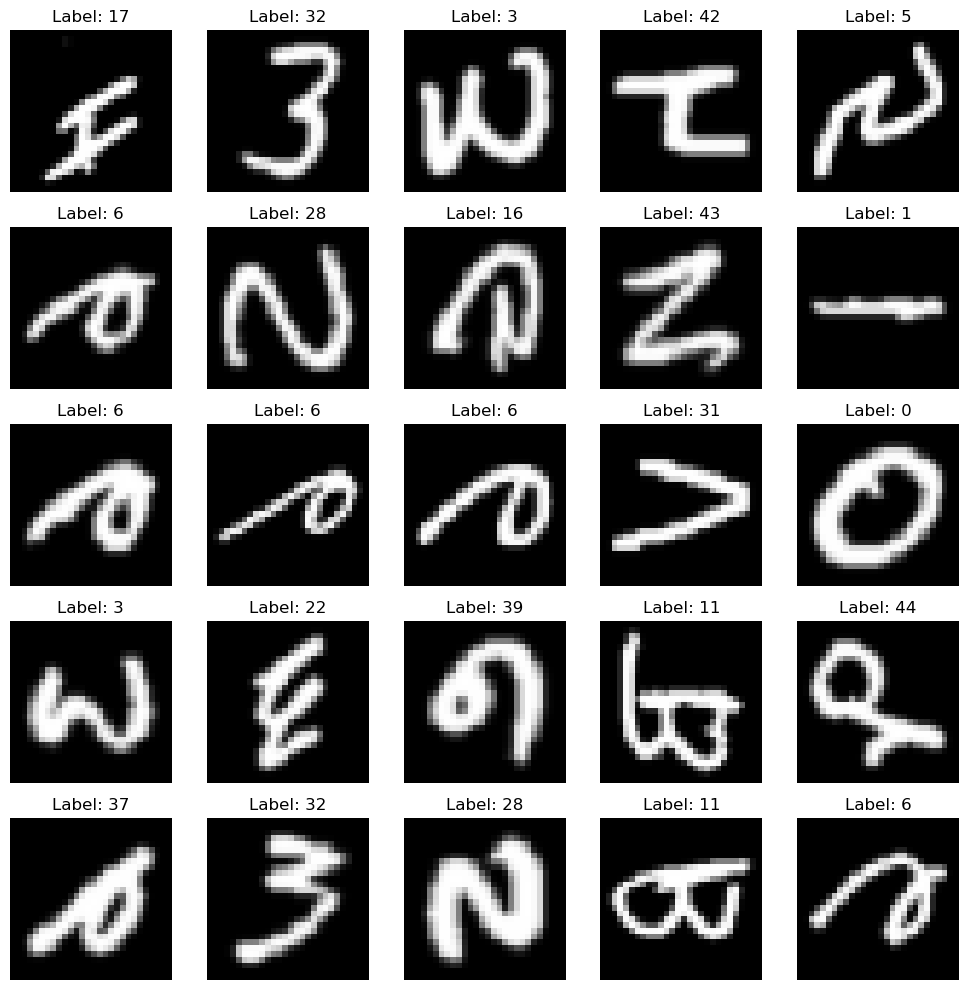

In [4]:
num_samples = 25 
selected_data = train_set.sample(n=num_samples)

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for i, ax in enumerate(axes.flatten()):
    image = selected_data.iloc[i, 1:].values.reshape(28, 28)
    label = selected_data.iloc[i, 0]

    ax.imshow(image, cmap='gray')
    ax.set_title(f"Label: {label}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [5]:
# Splitting the dataset
Y_train = np.array(train_set.iloc[:,0].values)
X_train = np.array(train_set.iloc[:,1:].values)
#test_set
Y_test = np.array(test_set.iloc[:,0].values)
X_test = np.array(test_set.iloc[:,1:].values)
print(Y_train.shape)
print(X_train.shape)

X_train= X_train/255
X_test= X_test/255

(112799,)
(112799, 784)


In [6]:
labels1 = train_set["45"].values
labels=set(labels1)
labels=list(labels)
labels = [str(label) for label in labels]
print(labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46']


### Model 1 : KNN (K-Nearest Neighbours)

In [7]:
Y_train=Y_train.ravel()
Y_test=Y_test.ravel()

In [8]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
x_train=X_train
y_train=Y_train
x_test=X_test

X_train = X_train.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))

# One-hot encode the target labels for categorical classification.
Y_train = tf.keras.utils.to_categorical(Y_train, 47)  # 37 classes (26 letters + 1 for 'none')
Y_test = tf.keras.utils.to_categorical(Y_test, 47)
print(x_test.shape)

(18799, 784)


## Training Phase (KNN)

In [9]:
knn = KNeighborsClassifier(n_neighbors=7,
                           weights='distance',     #{distance, uniform}
                           algorithm = 'auto'
                           )  

In [10]:
# Apply PCA for feature extraction.
t0 = datetime.datetime.now()

pca = PCA(n_components=40)
pca.fit(x_train, y_train)

x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
print(x_train_pca.shape)
print(y_train.shape)
to = datetime.datetime.now() - t0
print('PCA runtime:', to)
# execute the 10-fold cross validation exercise in training dataset.
t0 = datetime.datetime.now()

CV_accuracy_score = cross_val_score(knn, x_train_pca, y_train, cv=10, scoring = 'accuracy')
CV_precision_score = cross_val_score(knn,x_train_pca, y_train, cv=10, scoring = 'precision_macro')
CV_recall_score = cross_val_score(knn, x_train_pca, y_train, cv=10, scoring = 'recall_macro')
CV_f1_score = cross_val_score(knn, x_train_pca, y_train, cv=10, scoring = 'f1_macro')
average_accuracy = np.mean(CV_accuracy_score)
average_precision = np.mean(CV_precision_score)
average_recall = np.mean(CV_recall_score)
average_f1 = np.mean(CV_f1_score)

to = datetime.datetime.now() - t0
print('KNN runtime:', to)

(112799, 40)
(112799,)
PCA runtime: 0:00:01.713042
KNN runtime: 0:01:49.374393


In [11]:
print('average_accuracy:', average_accuracy)
print('average_precision:', average_precision)
print('average_recall:', average_recall)
print('average_f1:', average_f1)

average_accuracy: 0.811310326760521
average_precision: 0.8143574948586798
average_recall: 0.8113115745274341
average_f1: 0.8107382690624902


## Testing Phase (KNN)

In [12]:
knn = knn.fit(x_train_pca, y_train)
pickle.dump(knn,open('model_knn.pkl','wb'))
knn_pkl = pickle.load(open('model_knn.pkl','rb'))
knn_pred=knn_pkl.predict(x_test_pca)
from sklearn.preprocessing import label_binarize

# Assuming knn_pred is a 1D array of predicted labels
knn_pred_multi_label = label_binarize(knn_pred, classes=range(47))

knn_accuracy = accuracy_score(Y_test, knn_pred_multi_label)*100

print("Accuracy for KNN {} %".format (knn_accuracy))
print(classification_report(Y_test, knn_pred_multi_label, target_names=labels))

Accuracy for KNN 81.1479334007128 %
              precision    recall  f1-score   support

           0       0.57      0.64      0.60       400
           1       0.49      0.59      0.53       400
           2       0.90      0.76      0.82       400
           3       0.94      0.95      0.95       400
           4       0.88      0.84      0.86       400
           5       0.87      0.75      0.81       400
           6       0.85      0.91      0.88       400
           7       0.92      0.98      0.95       400
           8       0.83      0.83      0.83       400
           9       0.60      0.77      0.67       400
          10       0.90      0.88      0.89       400
          11       0.88      0.81      0.85       400
          12       0.88      0.92      0.90       400
          13       0.87      0.80      0.83       400
          14       0.95      0.91      0.93       400
          15       0.58      0.54      0.56       400
          16       0.91      0.83      0.87  

## Dataset

The Digit-Character Dataset typically refers to a dataset that contains both handwritten **digits (0-9)** and **characters (A-Z, a-z)**. It is used for tasks like **optical character recognition (OCR)**, where the goal is to classify handwritten or printed digits and characters.

**Here the dataset used is **data-char** dataset**

In [13]:
df = pd.read_csv('dataset2.csv')

In [14]:
X = df.drop('class',axis = 1)
y = df['class']

## Preprocessing

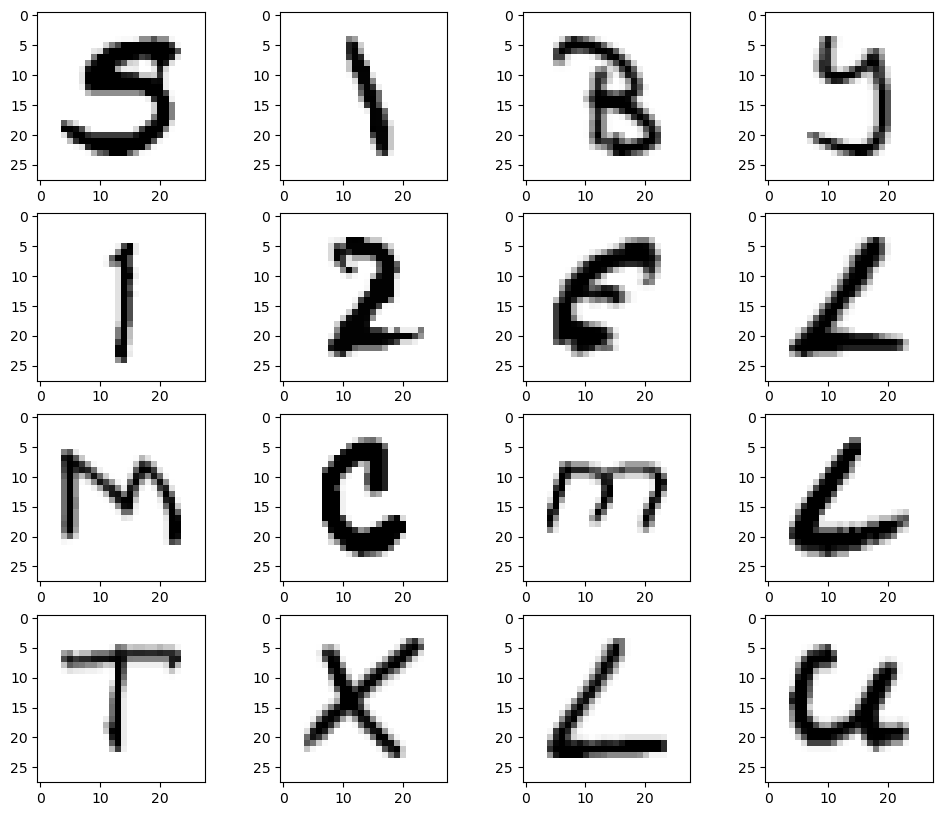

In [15]:
from sklearn.utils import shuffle

X_shuffle = shuffle(X)

plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle.iloc[i].values.reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

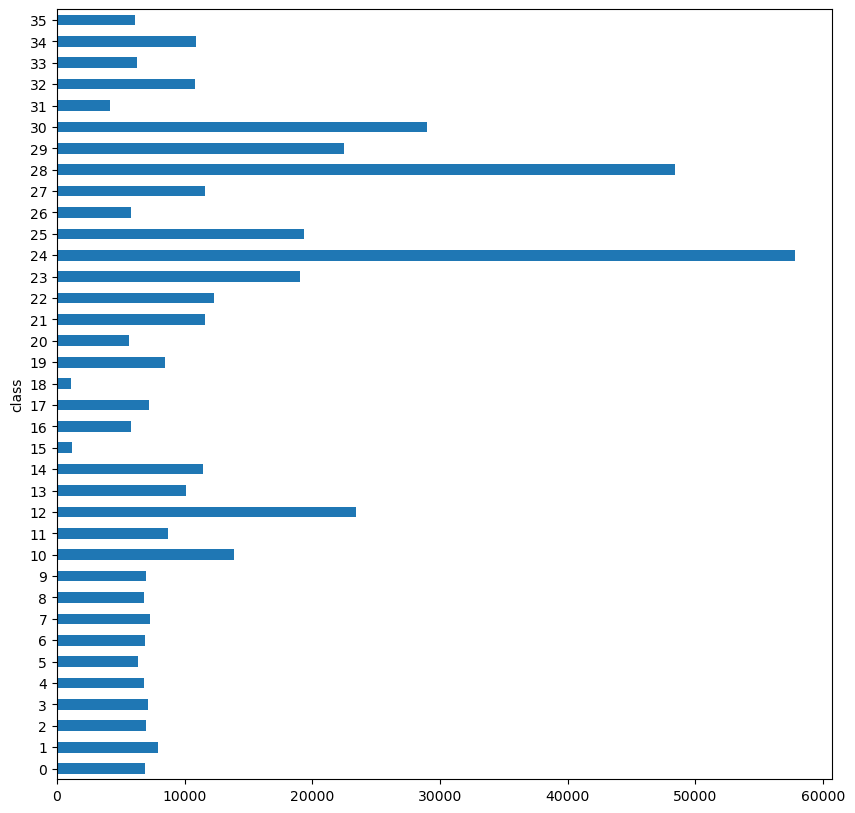

In [16]:
label_size = df.groupby('class').size()
label_size.plot.barh(figsize=(10,10))
plt.show()

In [17]:
data = np.array(df)
m, n = data.shape
np.random.shuffle(data)

data_test = data[0:12450].T
Y_test = data_test[n-1]
X_test = data_test[0:n-1]
X_test = X_test / 255.

data_train = data[12450:m].T
Y_train = data_train[n-1]
X_train = data_train[0:n-1]
X_train = X_train / 255.
_,m_train = X_train.shape

print(_, m_train)

784 430000


In [18]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(784, 430000)
(430000,)
(784, 12450)
(12450,)


In [19]:
Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)
print(Y_train)
print(Y_test)

[28 30 25 ... 19  1  2]
[25 30 21 ... 25 16  4]


In [20]:
classes = []

for i in range(36):
    
    if i < 10:
        classes.append(chr(i+48))
    else:
        classes.append(chr(i-10+65))
        
classes

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

### Model 2 : ANN (Artificial Neural Network)

In [21]:
X_train = X_train.T
X_train.shape

(430000, 784)

In [22]:
Y_train.shape

(430000,)

In [23]:
X_test = X_test.T
X_test.shape

(12450, 784)

In [24]:
Y_test.shape

(12450,)

In [25]:
Y_train_encoded = to_categorical(Y_train, num_classes=36)
Y_test_encoded = to_categorical(Y_test, num_classes=36)

## Training Phase (ANN)

In [26]:
ann = Sequential([
    Dense(784, activation='relu', input_shape=(784,)),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(36, activation='softmax')
])

C:\Users\Shyam Mashru\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 36)                  │           9,252 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,157,940 (4.42 MB)

 Trainable params: 1,157,940 (4.42 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
ann.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [29]:
ann_fit=ann.fit(X_train, Y_train_encoded, epochs=10, validation_data=(X_test,Y_test_encoded))

Epoch 1/10
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 90s 7ms/step - accuracy: 0.7714 - loss: 0.8353 - val_accuracy: 0.9391 - val_loss: 0.2104
Epoch 2/10
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 89s 7ms/step - accuracy: 0.8867 - loss: 0.4323 - val_accuracy: 0.9482 - val_loss: 0.1928
Epoch 3/10
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 93s 7ms/step - accuracy: 0.8967 - loss: 0.4141 - val_accuracy: 0.9525 - val_loss: 0.1876
Epoch 4/10
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 94s 7ms/step - accuracy: 0.9022 - loss: 0.3991 - val_accuracy: 0.9535 - val_loss: 0.1800
Epoch 5/10
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 95s 7ms/step - accuracy: 0.9046 - loss: 0.3974 - val_accuracy: 0.9549 - val_loss: 0.1777
Epoch 6/10
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 93s 7ms/step - accuracy: 0.9056 - loss: 0.4020 - val_accuracy: 0.9520 - val_loss: 0.1866
Epoch 7/10
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 94s 7ms/step - accuracy: 0.9078 - loss: 0.4009 - val_accuracy: 0.9489 - val_loss: 0.1982
Epoch 8/10
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 94s 7ms/step - accuracy: 

In [30]:
ann.save('model_ann.h5')

In [31]:
history = ann_fit.history

training_loss = history['loss']
validation_loss = history['val_loss']

training_accuracy = history['accuracy']
validation_accuracy = history['val_accuracy']


print("Training Loss:", training_loss)
print("Validation Loss:", validation_loss)
print("Training Accuracy:", training_accuracy)
print("Validation Accuracy:", validation_accuracy)

Training Loss: [0.5856606960296631, 0.4284217059612274, 0.41357186436653137, 0.4021643102169037, 0.4029637277126312, 0.4024350941181183, 0.40700167417526245, 0.40605905652046204, 0.4046640694141388, 0.40432900190353394]
Validation Loss: [0.21041178703308105, 0.19278688728809357, 0.18763020634651184, 0.18001815676689148, 0.17766670882701874, 0.1865542232990265, 0.19816258549690247, 0.17374297976493835, 0.19501137733459473, 0.18392662703990936]
Training Accuracy: [0.8413860201835632, 0.889555811882019, 0.8969371914863586, 0.9021976590156555, 0.9039070010185242, 0.9063650965690613, 0.907376766204834, 0.9087907075881958, 0.9100139737129211, 0.910986065864563]
Validation Accuracy: [0.9391164779663086, 0.9481927752494812, 0.9525301456451416, 0.9534939527511597, 0.9549397826194763, 0.9519678950309753, 0.9489156603813171, 0.9553413391113281, 0.9516465663909912, 0.9567871689796448]


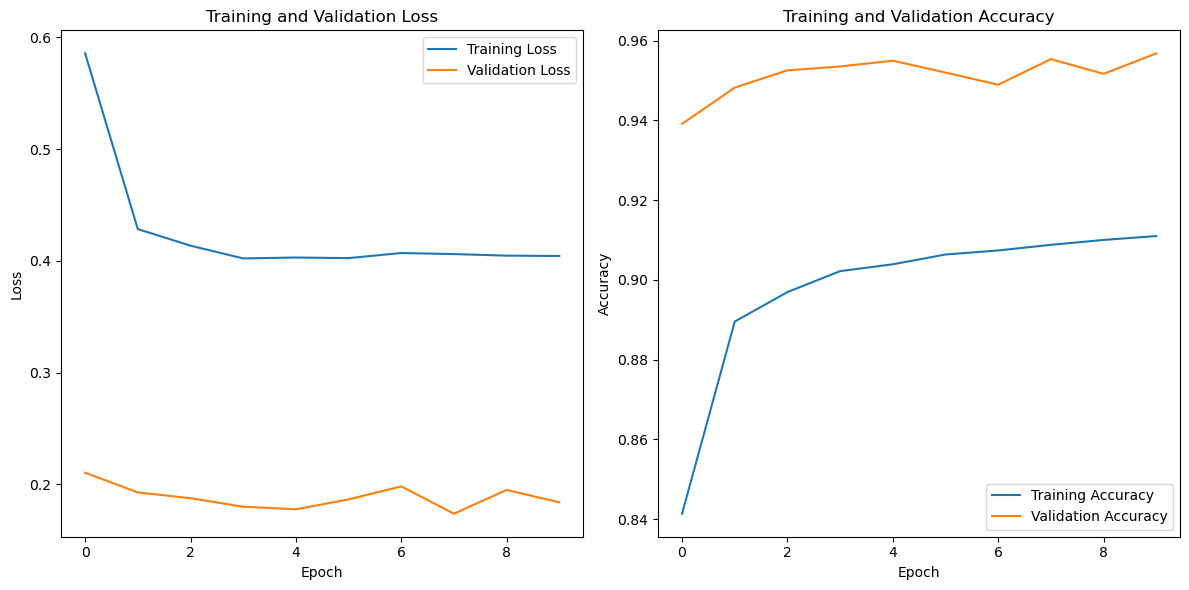

In [32]:
# Plotting the Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting the Accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Testing Phase (ANN)

In [33]:
predictions = ann.predict(X_test)
predictions

390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.00000000e+00, 0.00000000e+00, 1.41563499e-34, ...,
        0.00000000e+00, 1.62924422e-17, 0.00000000e+00],
       [1.21308877e-12, 5.62371845e-30, 3.67277369e-33, ...,
        4.20817197e-34, 2.68559737e-15, 0.00000000e+00],
       [0.00000000e+00, 3.95252407e-11, 3.79873101e-17, ...,
        1.23579515e-11, 1.17385470e-18, 1.24951910e-10],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 3.28148387e-26, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.12298478e-37, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.57006902e-08, 4.49053897e-03, 7.82028306e-04, ...,
        3.39707662e-03, 8.95476267e-02, 3.53942123e-05]], dtype=float32)

In [34]:
Y_test_pred = np.argmax(predictions, axis=1)

In [35]:
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [36]:
ann_accuracy = get_accuracy(Y_test_pred, Y_test)
ann_accuracy

[25 30 21 ... 25 16  4] [25 30 21 ... 25 16  4]


0.9567871485943775

## Evaluation (ANN)

In [37]:
cls_report = classification_report(Y_test, Y_test_pred)
print(cls_report)

              precision    recall  f1-score   support

           0       0.98      0.66      0.78       189
           1       0.98      0.98      0.98       221
           2       0.97      0.92      0.94       195
           3       0.99      0.90      0.94       206
           4       0.97      0.95      0.96       199
           5       0.97      0.83      0.89       184
           6       0.99      0.95      0.97       171
           7       0.99      0.98      0.98       174
           8       0.96      0.93      0.94       190
           9       0.97      0.94      0.96       194
          10       0.90      0.97      0.93       359
          11       0.81      0.92      0.86       251
          12       0.98      0.98      0.98       660
          13       0.94      0.89      0.92       319
          14       0.99      0.94      0.97       327
          15       0.97      0.97      0.97        36
          16       0.97      0.88      0.92       163
          17       0.92    

In [38]:
cm = confusion_matrix(y_true = Y_test, y_pred = Y_test_pred)
cm

array([[124,   0,   0, ...,   0,   0,   0],
       [  0, 216,   0, ...,   1,   0,   0],
       [  0,   0, 179, ...,   0,   0,   8],
       ...,
       [  0,   0,   0, ..., 160,   2,   1],
       [  0,   1,   1, ...,   1, 316,   0],
       [  0,   0,   0, ...,   0,   0, 157]], dtype=int64)

In [39]:
def plot_confusion_matrix(cm, classes, cmap=plt.cm.Blues):
    
    plt.figure(figsize=(23,23))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


### Model 3 : CNN (Convolution Neural Network) using Keras

In [40]:
X_train_reshaped = X_train.reshape(-1, 28, 28, 1)
X_test_reshaped = X_test.reshape(-1, 28, 28, 1)

## Training Phase (CNN)

In [41]:
cnn = Sequential([
    
    Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),
    
    Conv2D(64, kernel_size=(3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),
    
    Flatten(),
    
    Dense(128, activation='relu'),
#     Dropout(0.5),
    Dense(64, activation='relu'),
#     Dropout(0.5),
    Dense(36, activation='softmax')
])

C:\Users\Shyam Mashru\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 36)                  │           2,340 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 431,332 (1.65 MB)

 Trainable params: 431,140 (1.64 MB)

 Non-trainable params: 192 (768.00 B)

In [43]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [44]:
cnn_fit=cnn.fit(X_train_reshaped, Y_train_encoded, epochs=10, validation_data=(X_test_reshaped,Y_test_encoded))

Epoch 1/10
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 184s 14ms/step - accuracy: 0.9130 - loss: 0.3157 - val_accuracy: 0.9735 - val_loss: 0.0867
Epoch 2/10
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 179s 13ms/step - accuracy: 0.9761 - loss: 0.0817 - val_accuracy: 0.9770 - val_loss: 0.0796
Epoch 3/10
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 181s 13ms/step - accuracy: 0.9820 - loss: 0.0596 - val_accuracy: 0.9806 - val_loss: 0.0715
Epoch 4/10
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 180s 13ms/step - accuracy: 0.9857 - loss: 0.0461 - val_accuracy: 0.9847 - val_loss: 0.0557
Epoch 5/10
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 183s 14ms/step - accuracy: 0.9881 - loss: 0.0379 - val_accuracy: 0.9845 - val_loss: 0.0539
Epoch 6/10
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 185s 14ms/step - accuracy: 0.9899 - loss: 0.0315 - val_accuracy: 0.9821 - val_loss: 0.0622
Epoch 7/10
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 187s 14ms/step - accuracy: 0.9913 - loss: 0.0275 - val_accuracy: 0.9872 - val_loss: 0.0512
Epoch 8/10
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 188s 14ms/s

In [45]:
cnn.save('model_cnn.h5')

In [46]:
history = cnn_fit.history

training_loss = history['loss']
validation_loss = history['val_loss']

training_accuracy = history['accuracy']
validation_accuracy = history['val_accuracy']


print("Training Loss:", training_loss)
print("Validation Loss:", validation_loss)
print("Training Accuracy:", training_accuracy)
print("Validation Accuracy:", validation_accuracy)

Training Loss: [0.17092140018939972, 0.07853346318006516, 0.05923959240317345, 0.04692331328988075, 0.03872842341661453, 0.0325603112578392, 0.028454963117837906, 0.02532256580889225, 0.02257489785552025, 0.021023139357566833]
Validation Loss: [0.08667568862438202, 0.0796288549900055, 0.07146037369966507, 0.05568494647741318, 0.05393762141466141, 0.062225230038166046, 0.05123947560787201, 0.0526278093457222, 0.05182778462767601, 0.060562171041965485]
Training Accuracy: [0.9513023495674133, 0.9769790768623352, 0.9823023080825806, 0.9856604933738708, 0.9880046248435974, 0.9896581172943115, 0.9909418821334839, 0.9917418360710144, 0.9927535057067871, 0.9933720827102661]
Validation Accuracy: [0.9734939932823181, 0.9770281314849854, 0.980642557144165, 0.9846586585044861, 0.9844979643821716, 0.9820883274078369, 0.9872289299964905, 0.985381543636322, 0.9866666793823242, 0.9877911806106567]


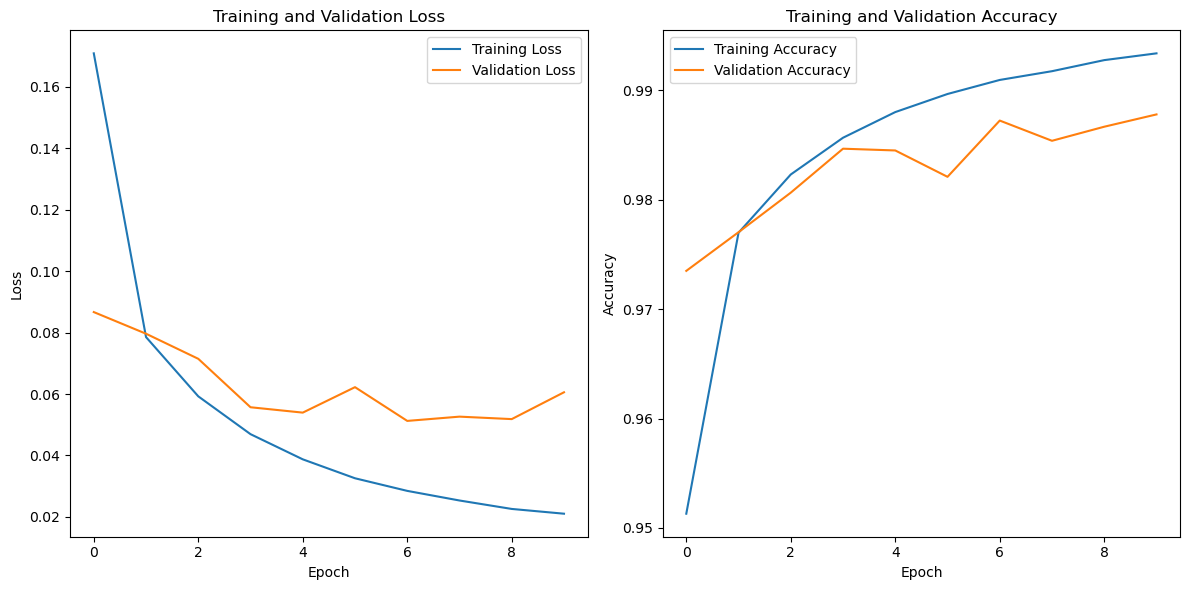

In [47]:
# Plotting the Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting the Accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Testing Phase (CNN)

In [48]:
predictions = cnn.predict(X_test_reshaped)
predictions

390/390 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([[0.0000000e+00, 4.6102573e-35, 1.7956161e-34, ..., 2.8179289e-32,
        2.2991574e-22, 3.6224941e-23],
       [9.7035003e-17, 3.1974024e-22, 2.3024143e-29, ..., 3.1965780e-19,
        1.6433384e-17, 6.8144246e-21],
       [2.6906024e-38, 2.3891938e-16, 2.0416269e-19, ..., 9.5581770e-22,
        1.1212501e-24, 1.3413404e-10],
       ...,
       [5.1939300e-32, 1.0777284e-31, 5.9796170e-31, ..., 1.8430447e-32,
        9.9989697e-24, 6.0703223e-26],
       [3.0327556e-20, 3.1903731e-29, 6.9998955e-17, ..., 9.2689037e-31,
        4.1849894e-21, 1.6593025e-15],
       [8.4803197e-19, 6.8297872e-21, 1.2075579e-15, ..., 2.2965674e-21,
        9.0208466e-12, 1.1009025e-18]], dtype=float32)

In [49]:
Y_test_pred = np.argmax(predictions, axis=1)

In [50]:
cnn_accuracy = get_accuracy(Y_test_pred, Y_test)
cnn_accuracy

[25 30 21 ... 25 16  4] [25 30 21 ... 25 16  4]


0.9877911646586346

## Evaluation

In [51]:
cls_report = classification_report(Y_test, Y_test_pred)
print(cls_report)

              precision    recall  f1-score   support

           0       0.98      0.84      0.91       189
           1       1.00      0.99      0.99       221
           2       1.00      0.97      0.98       195
           3       0.99      1.00      0.99       206
           4       0.96      0.99      0.98       199
           5       0.97      0.96      0.97       184
           6       0.98      0.99      0.99       171
           7       0.98      0.99      0.99       174
           8       0.99      0.98      0.98       190
           9       0.99      0.97      0.98       194
          10       1.00      0.99      0.99       359
          11       1.00      0.97      0.98       251
          12       1.00      0.99      0.99       660
          13       1.00      0.97      0.98       319
          14       0.99      1.00      1.00       327
          15       1.00      0.94      0.97        36
          16       0.96      0.99      0.97       163
          17       0.98    

In [52]:
cm = confusion_matrix(y_true = Y_test, y_pred = Y_test_pred)
cm


array([[159,   0,   0, ...,   0,   0,   0],
       [  0, 219,   0, ...,   0,   0,   0],
       [  0,   0, 189, ...,   0,   0,   3],
       ...,
       [  0,   0,   0, ..., 166,   0,   0],
       [  0,   0,   0, ...,   1, 321,   0],
       [  0,   0,   0, ...,   0,   0, 162]], dtype=int64)

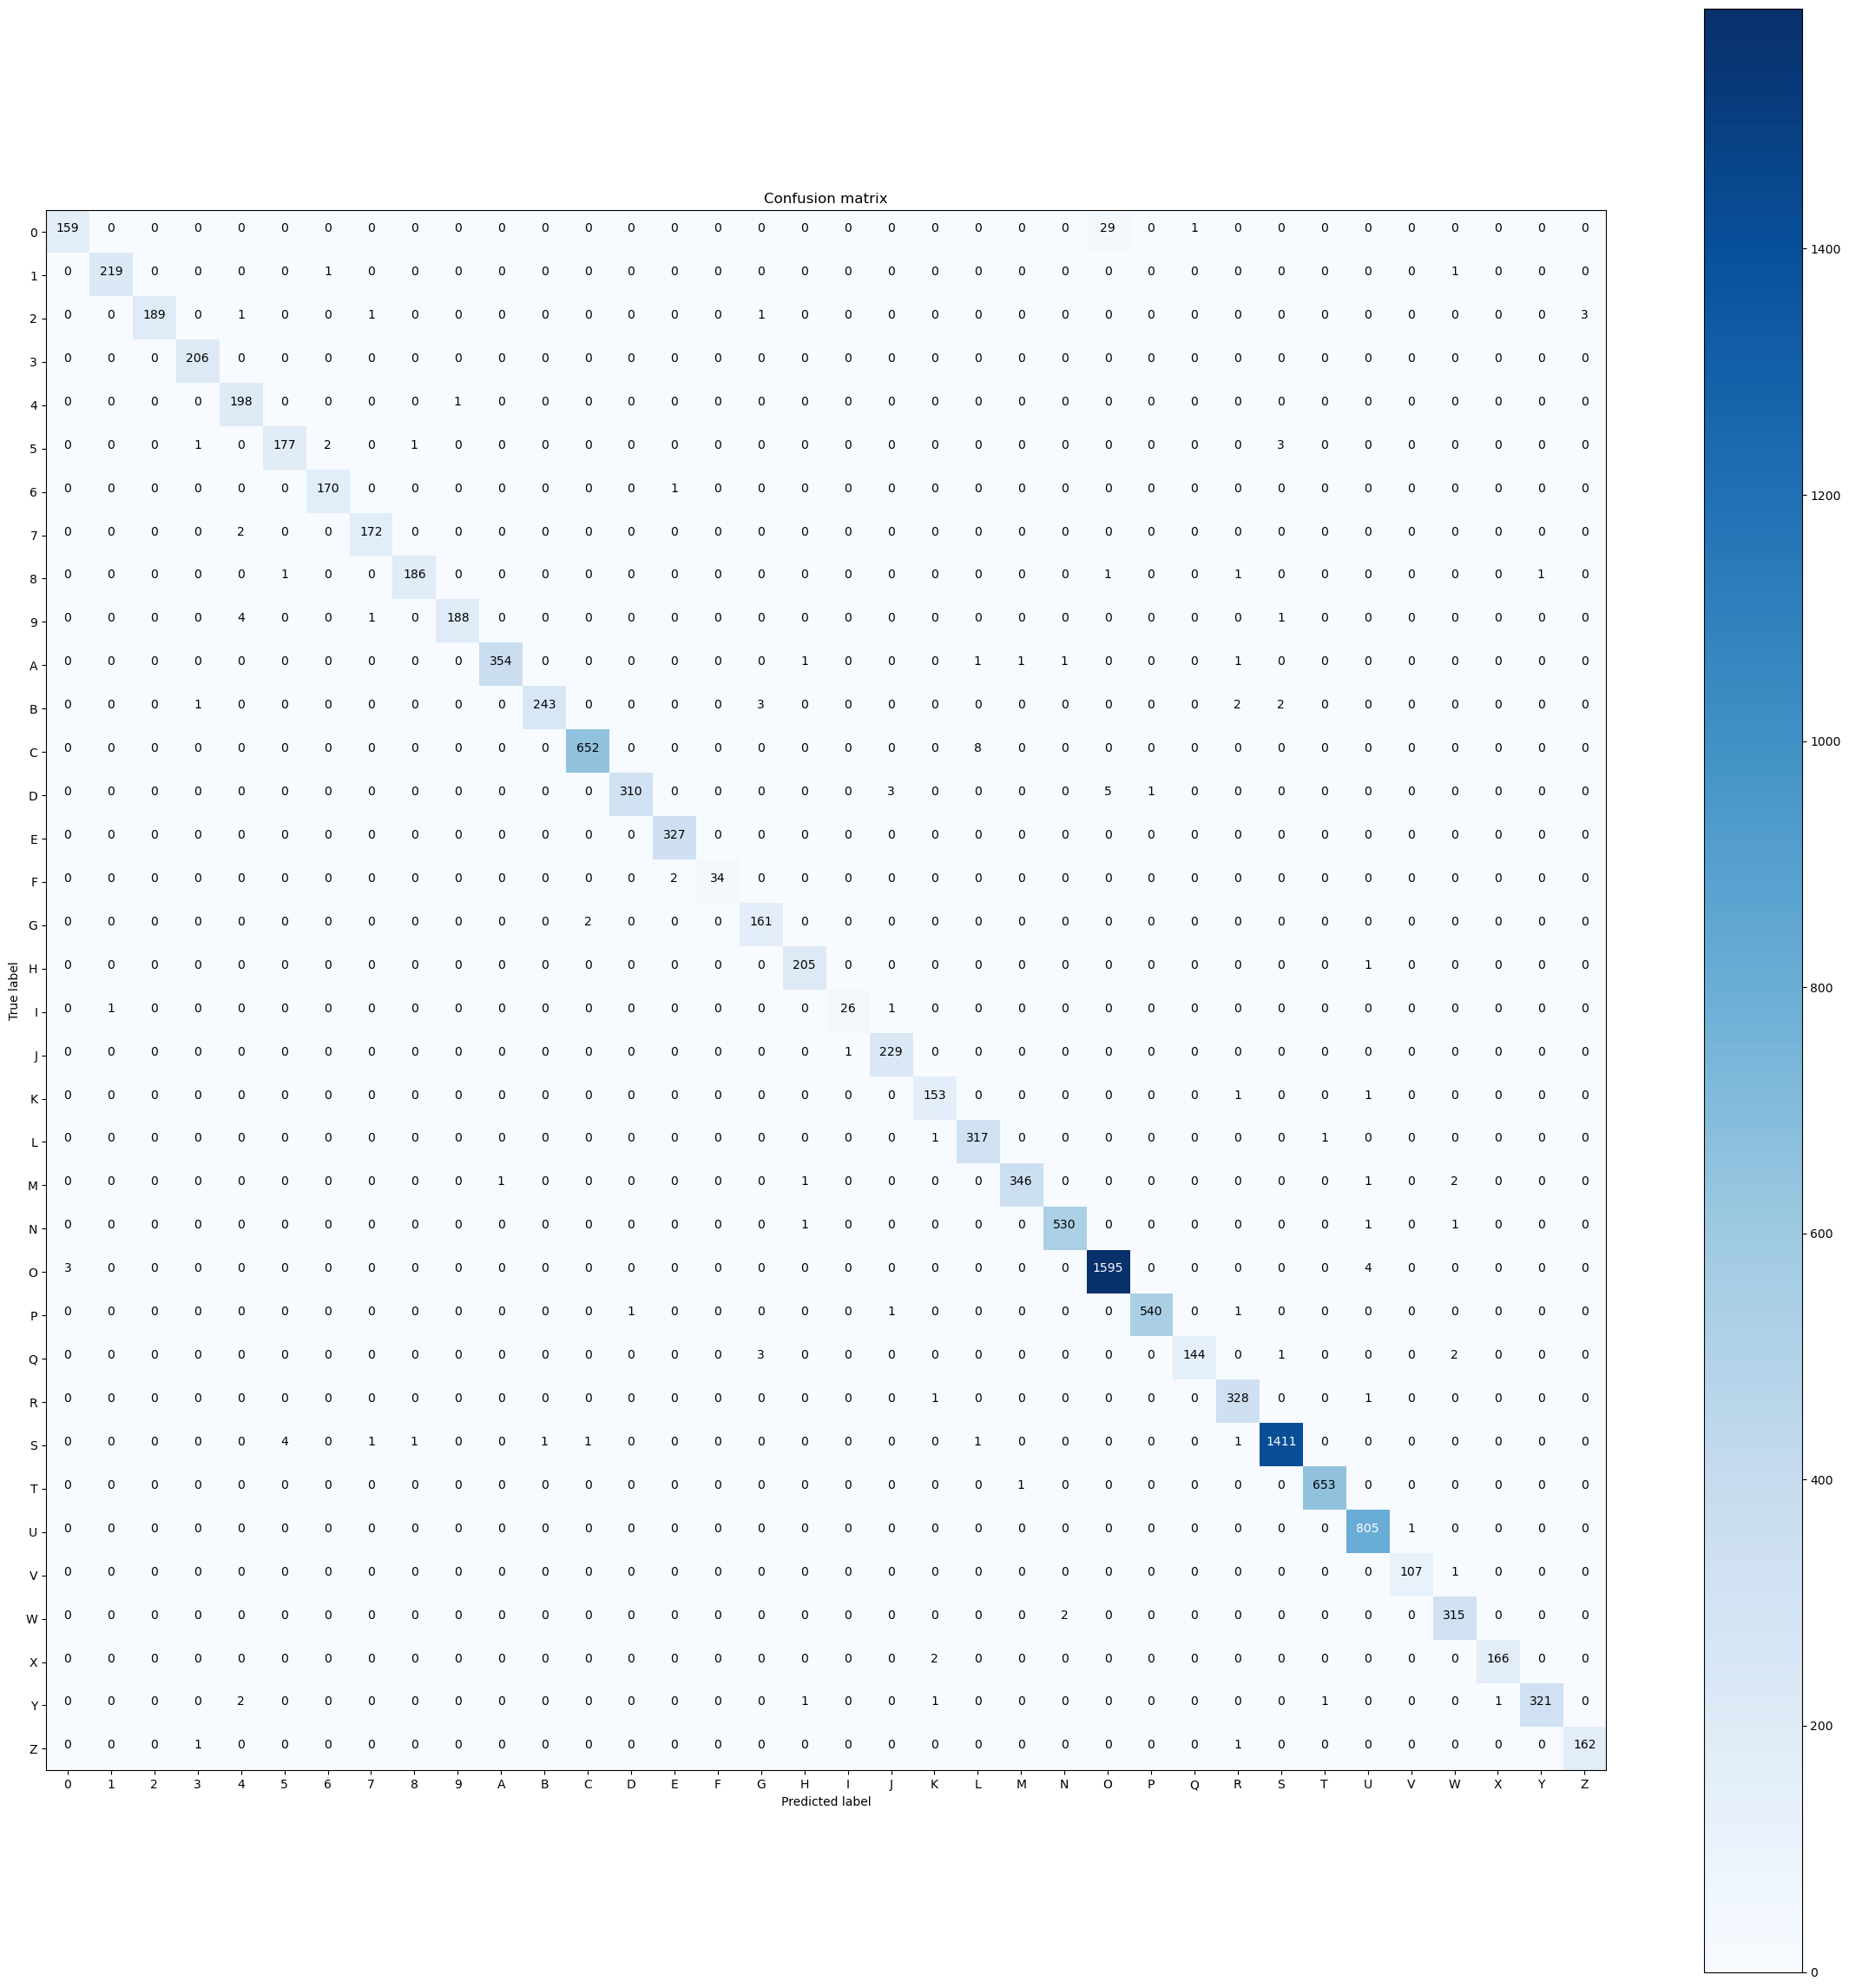

In [53]:
plot_confusion_matrix(cm, classes)

## Overall Evaluation

In [54]:
accuracies = [knn_accuracy, ann_accuracy*100, cnn_accuracy*100]
accuracies

[81.1479334007128, 95.67871485943775, 98.77911646586345]

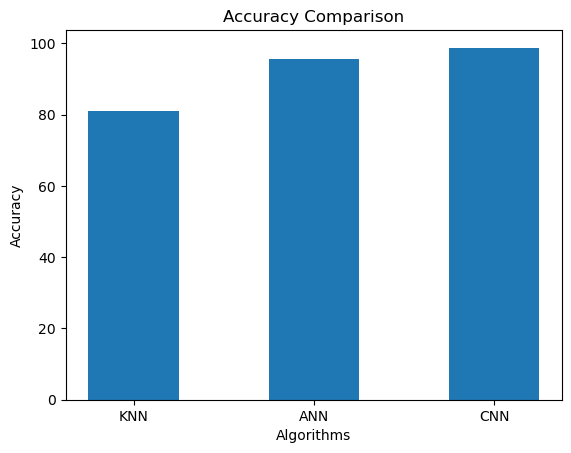

In [55]:
import matplotlib.pyplot as plt
label = ["KNN", "ANN", "CNN"]

plt.bar(label, accuracies, width = 0.5)
plt.title("Accuracy Comparison")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

## Result

* **KNN : Accuracy - 81%**

* **ANN : Accuracy - 95%**

* **CNN : Accuracy - 99%**

## Conclusion

* **CNN is better than ANN and KNN for digit recognition (OCR)**